In [1]:
from dataloader import load_data_one_hot_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [3]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_losses_bs = {}
train_accuracies_bs = {}
val_losses_bs = {}
val_accuracies_bs = {}
test_accuracies_bs = {}
for bs in [32, 64, 128]:
    print(f"Training for batch_size={bs}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_one_hot_encoded(root_folder, file_name, spike_encoding='temporal', num_steps=50, batch_size=bs, device=device)

    model = SNNModelSimple(num_features, num_outputs)
    model.to(device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_bs[bs] = train_losses
    train_accuracies_bs[bs] = train_accuracies
    val_losses_bs[bs] = val_losses
    val_accuracies_bs[bs] = val_accuracies

    test_accuracies_bs[bs] = evaluate_model(model, test_loader,encoding='one-hot')

out_file_name = 'exp6_temporal_t_50_bs_128_ep_10_temporal.pkl' # exp1, t=10...250, step=50, batch_size=128, epochs=10
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_bs, "train_accuracies": train_accuracies_bs, "val_losses": val_losses_bs, "val_accuracies": val_accuracies_bs, "test_accuracies": test_accuracies_bs}, f)


Training for batch_size=32
Epoch 1/10, Train Loss: 0.0614, Train Accuracy: 40.07%, Val Loss: 56.2375, Val Accuracy: 50.77%, Time: 77.34s
Epoch 2/10, Train Loss: 0.0524, Train Accuracy: 53.71%, Val Loss: 52.3075, Val Accuracy: 55.98%, Time: 75.20s
Epoch 3/10, Train Loss: 0.0499, Train Accuracy: 56.75%, Val Loss: 57.3126, Val Accuracy: 55.50%, Time: 78.72s
Epoch 4/10, Train Loss: 0.0485, Train Accuracy: 58.54%, Val Loss: 61.7047, Val Accuracy: 59.45%, Time: 81.38s


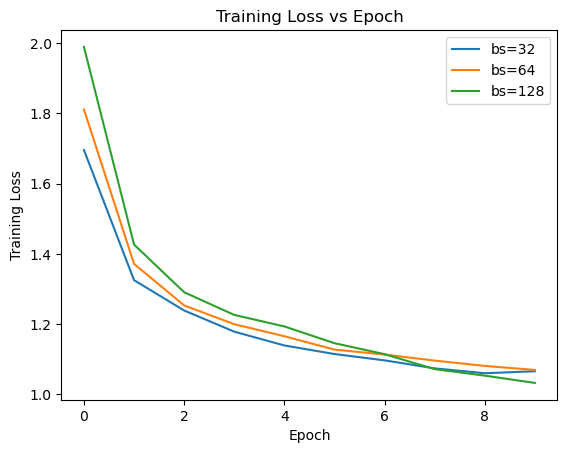

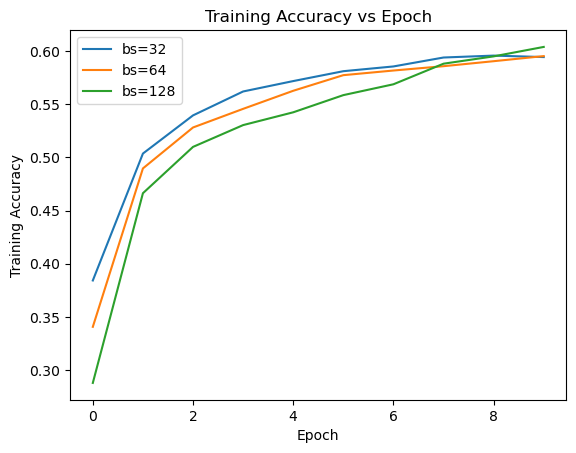

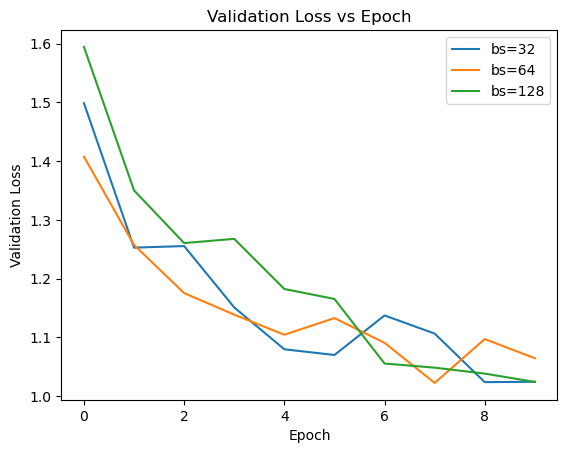

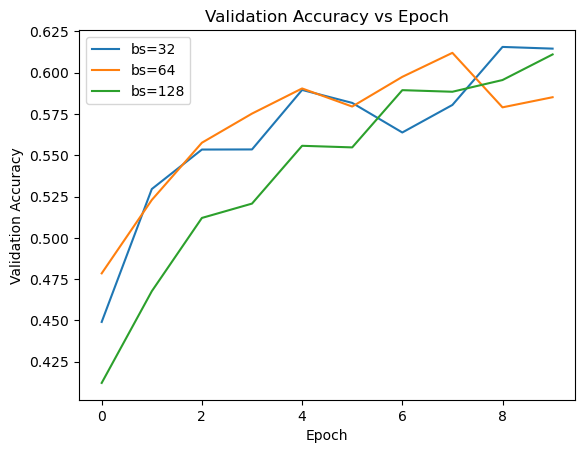

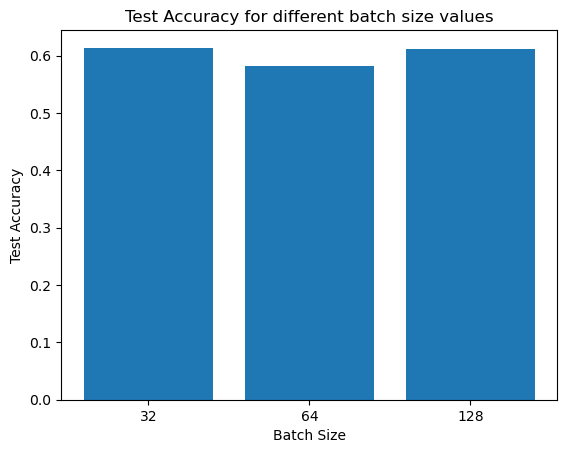

In [3]:
batch_size = [32, 64, 128]

plt.figure()
for bs in batch_size:
    plt.plot(train_losses_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch") 
    plt.ylabel("Training Loss")
    plt.legend()
    plt.title("Training Loss vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(train_accuracies_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend()
    plt.title("Training Accuracy vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(val_losses_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.title("Validation Loss vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(val_accuracies_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.title("Validation Accuracy vs Epoch")

plt.figure()
plt.bar([str(bs) for bs in batch_size], [test_accuracies_bs[bs] for bs in batch_size])
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for different batch size values")
plt.show()